# A Pandemic: An Analysis of COVID-19 

## Amanda Le and Sneha Narayanan

### Introduction

COVID-19 has been a prevalent part of the past several months of our lives and as vaccines have come in order to help the future of all invdividuals it is important to look back and analyze the rollercoaster of a ride its been especially when picking apart the cases, not only specifically in North America but throughout the world over the period of the pandemic so far. Furthermore, consideration of other factors that are influencing the difference in COVID-19 cases in different places are also investigated. Delving into the specifics of this data is crucial at a time where a vaccine is used to help prevent the spread of the virus as well as learning more about the virus itself and what can help stop it. 

What is our end goal? We need to work together to make the number of cases go to 0 and the only way to make this pivotal change is to understand where a majority of the cases are coming from not only at the current moment but over time and how to prevent spikes in cases. The strict guidelines with social distancing rules must continue to stay strong. We predict that earlier start dates as well as longer lockdown durations allowed for lower amount of total cases. Not only that but we believe that locations with higher poverty rates or population densities are key factors in having a higher positivity rate. There are also many other factors that we consider that could be affecting the spread of the virus. 

In our analysis, we will be visualizing the data of COVID-19 cases worldwide, then going specifically into North America where there are many cases. We will not only look at the total cases, but also discuss the amount of new cases over time. Here, we use different sklearn regression models in order to see which ML predicting method was the most accurate. After that, we analyze the different factors that could be potentially affecting the number of cases in an attempt to help reduce the number of cases in North America. 

In [1]:
!pip install folium
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model as lm 
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
import folium
from folium import plugins as plugins
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Data Scraping

To analyze the data over time for North America, we will scrape the data and get it daily beginning April 12th. Since the data was for every state (including U.S. territories) we will get the data per day and then concatenate it for each month and save them into separate dataframes. We will use data sourced from github and received COVID-19 cases from a reputable source by the Center of Systems Science and Engineering at Johns Hopkins University: https://github.com/CSSEGISandData/COVID-19 where even more data could be found. Not only that, but there were many sources that had used this data in order to provide a great interactive view of data throughout the world such as: https://ourworldindata.org/coronavirus. We will scrape the latest data that has been documented so far.

This is how we scrape the data for North America (using daily COVID data by state/territories and save them by month):

In [89]:
# This is for the month of April (data only begins from April 12th onwards)
li=[]
for i in range(12, 31):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '04'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_april = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_april

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
1          Alaska             US  2020-04-12 23:18:15  61.3707 -152.4044   
2         Arizona             US  2020-04-12 23:18:15  33.7298 -111.4312   
3        Arkansas             US  2020-04-12 23:18:15  34.9697  -92.3731   
4      California             US  2020-04-12 23:18:15  36.1162 -119.6816   
..            ...            ...                  ...      ...       ...   
53       Virginia             US  2020-05-01 02:32:32  37.7693  -78.1700   
54     Washington             US  2020-05-01 02:32:32  47.4009 -121.4905   
55  West Virginia             US  2020-05-01 02:32:32  38.4912  -80.9545   
56      Wisconsin             US  2020-05-01 02:32:32  44.2685  -89.6165   
57        Wyoming             US  2020-05-01 02:32:32  42.7560 -107.3025   

    Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0        3667      93        NaN   3470.0   1.0      75.988020        21583.0   
1         272       8       66.0    264.0   2.0      45.504049         8038.0   
2        3542     115        NaN   3427.0   4.0      48.662422        42109.0   
3        1280      27      367.0   1253.0   5.0      49.439423        19722.0   
4       22795     640        NaN  22155.0   6.0      58.137726       190328.0   
..        ...     ...        ...      ...   ...            ...            ...   
53      15847     552     2104.0  13191.0  51.0     200.411522        91509.0   
54      14327     836        0.0  13513.0  53.0     189.776596       187800.0   
55       1125      41      545.0    539.0  54.0      85.034142        44541.0   
56       6854     316     3352.0   3186.0  55.0     132.455425        76248.0   
57        559       7      371.0    181.0  56.0     112.420561         9446.0   

    People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                 437.0        2.610160  84000001  USA    460.300152   
1                  31.0        2.941176  84000002  USA   1344.711576   
2                   NaN        3.246753  84000004  USA    578.522286   
3                 130.0        2.109375  84000005  USA    761.753354   
4                5234.0        2.812020  84000006  USA    485.423868   
..                  ...             ...       ...  ...           ...   
53               3654.0        3.483309  84000051  USA   1157.282639   
54                  NaN        5.681580  84000053  USA   2487.613921   
55                  NaN        3.644444  84000054  USA   3366.671756   
56               1512.0        4.610446  84000055  USA   1473.513456   
57                 56.0        1.252236  84000056  USA   1899.686268   

    Hospitalization_Rate  
0              12.264945  
1              11.397059  
2                    NaN  
3              10.156250  
4              22.961176  
..                   ...  
53             23.057992  
54                   NaN  
55                   NaN  
56             22.060111  
57             10.017889  

[1120 rows x 18 columns]

In [90]:
# This is for the month of May 
li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '05'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 32):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '05'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_may = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_may

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-05-02 02:32:31  32.3182  -86.9023   
1           Alaska             US  2020-05-02 02:32:31  61.3707 -152.4044   
2   American Samoa             US  2020-05-02 02:32:31 -14.2710 -170.1320   
3          Arizona             US  2020-05-02 02:32:31  33.7298 -111.4312   
4         Arkansas             US  2020-05-02 02:32:31  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-06-01 02:32:54  37.7693  -78.1700   
54      Washington             US  2020-06-01 02:32:54  47.4009 -121.4905   
55   West Virginia             US  2020-06-01 02:32:54  38.4912  -80.9545   
56       Wisconsin             US  2020-06-01 02:32:54  44.2685  -89.6165   
57         Wyoming             US  2020-06-01 02:32:54  42.7560 -107.3025   

    Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0        7440     289        0.0   7005.0     1     155.558973        91933.0   
1         364       9      254.0    101.0     2      60.895125        20325.0   
2           0       0        0.0      0.0    60       0.000000           57.0   
3        7969     330     1528.0   6111.0     4     109.483581        74879.0   
4        3337      64     1973.0   1300.0     5     128.890120        49676.0   
..        ...     ...        ...      ...   ...            ...            ...   
53      44607    1375     5868.0  37364.0    51     522.604425       315391.0   
54      21702    1123        NaN  20584.0    53     284.994156       354354.0   
55       2010      75     1303.0    632.0    54     112.155978        97622.0   
56      18403     592    11646.0   6165.0    55     316.070564       268506.0   
57        903      16      658.0    229.0    56     156.023492        24393.0   

    People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                1008.0        3.962161  84000001  USA   1960.653006   
1                   NaN        2.472527  84000002  USA   3400.256629   
2                   NaN             NaN        16  ASM    102.442444   
3                1203.0        4.141047  84000004  USA   1028.738993   
4                 414.0        1.917890  84000005  USA   1918.713092   
..                  ...             ...       ...  ...           ...   
53               7326.0        3.082476  84000051  USA   3695.041860   
54               3480.0        5.151599  84000053  USA   4653.433738   
55                  NaN        3.731343  84000054  USA   5447.209409   
56               2583.0        3.216867  84000055  USA   4611.576533   
57                 85.0        1.771872  84000056  USA   4214.707676   

    Hospitalization_Rate  
0              13.819578  
1                    NaN  
2                    NaN  
3              15.095997  
4              12.406353  
..                   ...  
53             16.423431  
54             16.035388  
55                   NaN  
56             14.035755  
57              9.413068  

[1798 rows x 18 columns]

In [91]:
# This is for the month of June 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '06'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 31):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '06'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_june = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_june

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-06-02 02:33:16  32.3182  -86.9023   
1           Alaska             US  2020-06-02 02:33:16  61.3707 -152.4044   
2   American Samoa             US  2020-06-02 02:33:16 -14.2710 -170.1320   
3          Arizona             US  2020-06-02 02:33:16  33.7298 -111.4312   
4         Arkansas             US  2020-06-02 02:33:16  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-07-01 04:34:05  37.7693  -78.1700   
54      Washington             US  2020-07-01 04:34:05  47.4009 -121.4905   
55   West Virginia             US  2020-07-01 04:34:05  38.4912  -80.9545   
56       Wisconsin             US  2020-07-01 04:34:05  44.2685  -89.6165   
57         Wyoming             US  2020-07-01 04:34:05  42.7560 -107.3025   

    Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0       18525     646     9355.0   8629.0     1     379.957110       223523.0   
1         466      10      368.0     88.0     2      63.700798        54190.0   
2           0       0        NaN      0.0    60       0.000000          174.0   
3       20129     918     4869.0  14342.0     4     276.545990       228070.0   
4        7443     133     5401.0   1909.0     5     246.636296       133236.0   
..        ...     ...        ...      ...   ...            ...            ...   
53      62787    1763     8080.0  52944.0    51     735.596746       645034.0   
54      33439    1303        NaN  31492.0    53     431.050049       548220.0   
55       2905      93     2272.0    540.0    54     162.096078       171764.0   
56      28659     784    22587.0   5288.0    55     492.216829       571201.0   
57       1487      20     1097.0    370.0    56     256.929050        33672.0   

    People_Hospitalized  Mortality_Rate         UID ISO3  Testing_Rate  \
0                1856.0        3.467525  84000001.0  USA   4558.730703   
1                   NaN        2.145923  84000002.0  USA   7407.609921   
2                   NaN             NaN        16.0  ASM    312.719038   
3                3018.0        4.560584  84000004.0  USA   3133.381886   
4                 711.0        1.786914  84000005.0  USA   4414.998456   
..                  ...             ...         ...  ...           ...   
53               8982.0        2.807906  84000051.0  USA   7557.056577   
54               4323.0        4.058006  84000053.0  USA   7199.313241   
55                  NaN        3.201377  84000054.0  USA   9584.258434   
56               3446.0        2.735615  84000055.0  USA   9810.347356   
57                117.0        1.344990  84000056.0  USA   5817.965682   

    Hospitalization_Rate  
0               9.962426  
1                    NaN  
2                    NaN  
3              14.993293  
4               9.552600  
..                   ...  
53             14.305509  
54             13.170241  
55                   NaN  
56             12.024146  
57              7.868191  

[1740 rows x 18 columns]

In [92]:
# This is for the month of July 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '07'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 32):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '07'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_july = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_july

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-07-02 04:33:59  32.3182  -86.9023   
1           Alaska             US  2020-07-02 04:33:59  61.3707 -152.4044   
2   American Samoa             US  2020-07-02 04:33:59 -14.2710 -170.1320   
3          Arizona             US  2020-07-02 04:33:59  33.7298 -111.4312   
4         Arkansas             US  2020-07-02 04:33:59  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-08-01 04:36:46  37.7693  -78.1700   
54      Washington             US  2020-08-01 04:36:46  47.4009 -121.4905   
55   West Virginia             US  2020-08-01 04:36:46  38.4912  -80.9545   
56       Wisconsin             US  2020-08-01 04:36:46  44.2685  -89.6165   
57         Wyoming             US  2020-08-01 04:36:46  42.7560 -107.3025   

    Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0       39647     972    18866.0  19124.0     1     794.626350       413953.0   
1         975      14      528.0    433.0     2     133.279566       114400.0   
2           0       0        NaN      0.0    60       0.000000          696.0   
3       84105    1725     9715.0  72665.0     4    1155.492101       549596.0   
4       21197     277    15163.0   5757.0     5     702.398168       314858.0   
..        ...     ...        ...      ...   ...            ...            ...   
53      89888    2174    11937.0  75777.0    51    1053.105265      1110747.0   
54      57586    1603        NaN  54239.0    53     732.813974       973654.0   
55       6579     116     4815.0   1648.0    54     367.101583       283988.0   
56      52940     934    42317.0   9689.0    55     909.241736       939083.0   
57       2726      26     2123.0    577.0    56     471.007794        53299.0   

    People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                2803.0        2.494738  84000001  USA   8442.532762   
1                   NaN        1.435897  84000002  USA  15638.135726   
2                   NaN             NaN        16  ASM   1250.876152   
3                4837.0        2.051008  84000004  USA   7550.726316   
4                1448.0        1.306789  84000005  USA  10433.348223   
..                  ...             ...       ...  ...           ...   
53              13271.0        2.418565  84000051  USA  13013.233290   
54               5568.0        2.802717  84000053  USA  12786.180975   
55                  NaN        1.763186  84000054  USA  15846.244756   
56               4637.0        1.764261  84000055  USA  16128.701502   
57                166.0        0.953778  84000056  USA   9209.187244   

    Hospitalization_Rate  
0               7.194189  
1                    NaN  
2                    NaN  
3               5.751144  
4               6.831155  
..                   ...  
53             14.763928  
54              9.977958  
55                   NaN  
56              8.758972  
57              6.089508  

[1798 rows x 18 columns]

In [93]:
# This is for the month of August 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '08'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 32):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '08'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_aug = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_aug

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-08-02 04:35:05  32.3182  -86.9023   
1           Alaska             US  2020-08-02 04:35:05  61.3707 -152.4044   
2   American Samoa             US  2020-08-02 04:35:05 -14.2710 -170.1320   
3          Arizona             US  2020-08-02 04:35:05  33.7298 -111.4312   
4         Arkansas             US  2020-08-02 04:35:05  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-09-01 04:30:22  37.7693  -78.1700   
54      Washington             US  2020-09-01 04:30:22  47.4009 -121.4905   
55   West Virginia             US  2020-09-01 04:30:22  38.4912  -80.9545   
56       Wisconsin             US  2020-09-01 04:30:22  44.2685  -89.6165   
57         Wyoming             US  2020-09-01 04:30:22  42.7560 -107.3025   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0       90299    1603    35401.0   52345.0   1.0    1822.264508   
1        3136      24      930.0    2182.0   2.0     428.681763   
2           0       0        NaN       0.0  60.0       0.000000   
3      177002    3747    23064.0  150191.0   4.0    2431.774721   
4       43173     458    36034.0    6681.0   5.0    1430.609808   
..        ...     ...        ...       ...   ...            ...   
53     120594    2580    15085.0  102910.0  51.0    1412.626461   
54      75502    1912        NaN   72720.0  53.0     980.118828   
55      10249     215     8017.0    2017.0  54.0     571.883891   
56      75603    1122    67234.0    7247.0  55.0    1298.477578   
57       3850      37     3181.0     632.0  56.0     665.216437   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
0        697371.0              10521.0        1.794088  84000001  USA   
1        238633.0                  NaN        0.765306  84000002  USA   
2          1267.0                  NaN             NaN        16  ASM   
3        948650.0              11346.0        2.116925  84000004  USA   
4        514581.0               2852.0        1.060848  84000005  USA   
..            ...                  ...             ...       ...  ...   
53      1586551.0                  NaN        2.139747  84000051  USA   
54      1461354.0                  NaN        2.565820  84000053  USA   
55       436047.0                  NaN        2.097766  84000054  USA   
56      1253422.0                  NaN        1.484068  84000055  USA   
57        76273.0                  NaN        0.961039  84000056  USA   

    Testing_Rate  Hospitalization_Rate  
0   14222.816394             11.775174  
1   32620.412962                   NaN  
2    2277.097824                   NaN  
3   13033.203516              6.410097  
4   17051.505002              6.605981  
..           ...                   ...  
53  18587.633628                   NaN  
54  19190.735838                   NaN  
55  24330.984010                   NaN  
56  21527.457417                   NaN  
57  13178.715147                   NaN  

[1798 rows x 18 columns]

In [94]:
# This is for the month of September 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '09'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 31):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '09'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_sept = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_sept

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-09-02 04:30:23  32.3182  -86.9023   
1           Alaska             US  2020-09-02 04:30:23  61.3707 -152.4044   
2   American Samoa             US  2020-09-02 04:30:23 -14.2710 -170.1320   
3          Arizona             US  2020-09-02 04:30:23  33.7298 -111.4312   
4         Arkansas             US  2020-09-02 04:30:23  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-10-01 04:30:28  37.7693  -78.1700   
54      Washington             US  2020-10-01 04:30:28  47.4009 -121.4905   
55   West Virginia             US  2020-10-01 04:30:28  38.4912  -80.9545   
56       Wisconsin             US  2020-10-01 04:30:28  44.2685  -89.6165   
57         Wyoming             US  2020-10-01 04:30:28  42.7560 -107.3025   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0      127234    2200    48028.0   77388.0   1.0    2602.716398   
1        5297      39     2246.0    3012.0   2.0     724.083959   
2           0       0        NaN       0.0  60.0       0.000000   
3      202342    5044    30841.0  166457.0   4.0    2779.912998   
4       61497     814    55647.0    5036.0   5.0    2037.806299   
..        ...     ...        ...       ...   ...            ...   
53     148271    3208    17633.0  127254.0  51.0    1735.008732   
54      89463    2100        NaN   85396.0  53.0    1149.352985   
55      15850     355    11507.0    3988.0  54.0     884.414058   
56     122274    1327    99925.0   21022.0  55.0    2100.049567   
57       5948      50     4791.0    1107.0  56.0    1027.716200   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
0        958920.0                  NaN        1.723922  84000001  USA   
1        374255.0                  NaN        0.736266  84000002  USA   
2          1514.0                  NaN             NaN        16  ASM   
3       1208990.0                  NaN        2.492809  84000004  USA   
4        731025.0                  NaN        1.323642  84000005  USA   
..            ...                  ...             ...       ...  ...   
53      2049988.0                  NaN        2.164195  84000051  USA   
54      1854399.0                  NaN        2.429104  84000053  USA   
55       561568.0                  NaN        2.239748  84000054  USA   
56      1552370.0                  NaN        1.085268  84000055  USA   
57       101160.0                  NaN        0.840619  84000056  USA   

    Testing_Rate  Hospitalization_Rate  
0   19557.083814                   NaN  
1   51159.532223                   NaN  
2    2721.015079                   NaN  
3   16609.932767                   NaN  
4   24223.740177                   NaN  
..           ...                   ...  
53  24017.145296                   NaN  
54  24352.266013                   NaN  
55  31334.929557                   NaN  
56  26661.873711                   NaN  
57  17478.777868                   NaN  

[1740 rows x 18 columns]

In [95]:
# This is for the month of October 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '10'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 32):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '10'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_oct = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_oct

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-10-02 04:30:36  32.3182  -86.9023   
1           Alaska             US  2020-10-02 04:30:36  61.3707 -152.4044   
2   American Samoa             US  2020-10-02 04:30:36 -14.2710 -170.1320   
3          Arizona             US  2020-10-02 04:30:36  33.7298 -111.4312   
4         Arkansas             US  2020-10-02 04:30:36  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-11-01 04:39:05  37.7693  -78.1700   
54      Washington             US  2020-11-01 04:39:05  47.4009 -121.4905   
55   West Virginia             US  2020-11-01 04:39:05  38.4912  -80.9545   
56       Wisconsin             US  2020-11-01 04:39:05  44.2685  -89.6165   
57         Wyoming             US  2020-11-01 04:39:05  42.7560 -107.3025   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0      155727    2548    67948.0   85248.0   1.0    3176.384330   
1        7948      57     4838.0    3053.0   2.0    1086.467681   
2           0       0        NaN       0.0  60.0       0.000000   
3      219212    5674    35411.0  178127.0   4.0    3011.684614   
4       84821    1384    76186.0    7251.0   5.0    2810.686181   
..        ...     ...        ...       ...   ...            ...   
53     181190    3654    20008.0  157528.0  51.0    2122.776600   
54     110808    2345        NaN  105135.0  53.0    1411.720427   
55      24460     459    18827.0    5174.0  54.0    1364.843397   
56     237869    2031   175096.0   48242.0  55.0    3870.700810   
57      13298      87     8541.0    4670.0  56.0    2297.674853   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
0       1138732.0                  NaN        1.636018  84000001  USA   
1        462323.0                  NaN        0.717162  84000002  USA   
2          1571.0                  NaN             NaN        16  ASM   
3       1471368.0                  NaN        2.588362  84000004  USA   
4       1042616.0                  NaN        1.631671  84000005  USA   
..            ...                  ...             ...       ...  ...   
53      2626052.0                  NaN        2.016668  84000051  USA   
54      2426385.0                  NaN        2.200910  84000053  USA   
55       778494.0                  NaN        1.876533  84000054  USA   
56      3289120.0                  NaN        0.901189  84000055  USA   
57       130560.0                  NaN        0.654234  84000056  USA   

    Testing_Rate  Hospitalization_Rate  
0   23224.332755                   NaN  
1   63198.162792                   NaN  
2    2823.457522                   NaN  
3   20214.661458                   NaN  
4   34548.830872                   NaN  
..           ...                   ...  
53  30766.166650                   NaN  
54  31863.678190                   NaN  
55  43439.182165                   NaN  
56  56490.464297                   NaN  
57  22558.612479                   NaN  

[1798 rows x 18 columns]

In [96]:
# This is for the month of November 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '11'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
              
for i in range(10, 31):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '11'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_nov = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_nov

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-11-02 05:30:37  32.3182  -86.9023   
1           Alaska             US  2020-11-02 05:30:37  61.3707 -152.4044   
2   American Samoa             US  2020-11-02 05:30:37 -14.2710 -170.1320   
3          Arizona             US  2020-11-02 05:30:37  33.7298 -111.4312   
4         Arkansas             US  2020-11-02 05:30:37  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-12-01 05:30:26  37.7693  -78.1700   
54      Washington             US  2020-12-01 05:30:26  47.4009 -121.4905   
55   West Virginia             US  2020-12-01 05:30:26  38.4912  -80.9545   
56       Wisconsin             US  2020-12-01 05:30:26  44.2685  -89.6165   
57         Wyoming             US  2020-12-01 05:30:26  42.7560 -107.3025   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0      194458    2973    81005.0  110007.0   1.0    3956.305952   
1       16705      83     7104.0    9518.0   2.0    2283.523228   
2           0       0        NaN       0.0  60.0       0.000000   
3      247473    5979    41398.0  200096.0   4.0    3399.953591   
4      113057    1958   100067.0   11032.0   5.0    3746.333427   
..        ...     ...        ...       ...   ...            ...   
53     237835    4062    24199.0  209574.0  51.0    2786.415214   
54     171962    2762        NaN  162245.0  53.0    2167.056057   
55      47842     735    30320.0   16787.0  54.0    2669.535479   
56     411730    3494   315086.0   93150.0  55.0    7071.441256   
57      33305     215    24478.0    8612.0  56.0    5754.554141   

    People_Tested  People_Hospitalized  Mortality_Rate         UID ISO3  \
0       1352580.0                  NaN        1.532593  84000001.0  USA   
1        604207.0                  NaN        0.496857  84000002.0  USA   
2          1616.0                  NaN             NaN        16.0  ASM   
3       1785767.0                  NaN        2.416021  84000004.0  USA   
4       1346972.0                  NaN        1.731870  84000005.0  USA   
..            ...                  ...             ...         ...  ...   
53            NaN                  NaN             NaN  84000051.0  USA   
54            NaN                  NaN             NaN  84000053.0  USA   
55            NaN                  NaN             NaN  84000054.0  USA   
56            NaN                  NaN             NaN  84000055.0  USA   
57            NaN                  NaN             NaN  84000056.0  USA   

    Testing_Rate  Hospitalization_Rate  Total_Test_Results  \
0   27585.742737                   NaN                 NaN   
1   82593.278609                   NaN                 NaN   
2    2904.333136                   NaN                 NaN   
3   24534.090280                   NaN                 NaN   
4   44634.177700                   NaN                 NaN   
..           ...                   ...                 ...   
53  38970.412930                   NaN           3326327.0   
54  38009.293105                   NaN           2894367.0   
55  63496.521212                   NaN           1137951.0   
56  76016.834197                   NaN           4426030.0   
57  72497.706299                   NaN            419587.0   

    Case_Fatality_Ratio  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
53             1.707907  
54             1.681019  
55             1.536307  
56             0.848614  
57             0.645549  

[1740 rows x 20 columns]

In [101]:
# This is for the month of December 

li=[]
for i in range(1, 10):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '12'+'-0'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)
for i in range(10, 20):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
    string = '12'+'-'+str(i)+'-2020.csv'
    url = url + string
    li.append(url)

data_america_dec = pd.concat([pd.read_csv(url, sep=',', error_bad_lines=False) for url in li])
data_america_dec

Province_State Country_Region          Last_Update      Lat     Long_  \
0          Alabama             US  2020-12-02 05:30:41  32.3182  -86.9023   
1           Alaska             US  2020-12-02 05:30:41  61.3707 -152.4044   
2   American Samoa             US  2020-12-02 05:30:41 -14.2710 -170.1320   
3          Arizona             US  2020-12-02 05:30:41  33.7298 -111.4312   
4         Arkansas             US  2020-12-02 05:30:41  34.9697  -92.3731   
..             ...            ...                  ...      ...       ...   
53        Virginia             US  2020-12-20 05:30:33  37.7693  -78.1700   
54      Washington             US  2020-12-20 05:30:33  47.4009 -121.4905   
55   West Virginia             US  2020-12-20 05:30:33  38.4912  -80.9545   
56       Wisconsin             US  2020-12-20 05:30:33  44.2685  -89.6165   
57         Wyoming             US  2020-12-20 05:30:33  42.7560 -107.3025   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0      252900    3638   161946.0   87316.0   1.0    5157.871873   
1       33115     122     7165.0   25274.0   2.0    4450.990711   
2           0       0        NaN       0.0  60.0       0.000000   
3      337139    6687    53026.0  277426.0   4.0    4631.846519   
4      159309    2512   140682.0   16115.0   5.0    5278.971066   
..        ...     ...        ...       ...   ...            ...   
53     302972    4643    27633.0  270696.0  51.0    3549.543970   
54     222600    3104        NaN  219496.0  53.0    2923.219013   
55      71215    1122    47844.0   22249.0  54.0    3973.725370   
56     490679    4722   412499.0   73458.0  55.0    8427.386210   
57      41488     351    38620.0    2517.0  56.0    7168.441441   

    Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio         UID  \
0            1593842.0                  NaN             1.438513  84000001.0   
1            1018628.0                  NaN             0.374681  84000002.0   
2               1988.0                  NaN                  NaN        16.0   
3            2271914.0                  NaN             1.983455  84000004.0   
4            1691453.0                  NaN             1.576810  84000005.0   
..                 ...                  ...                  ...         ...   
53           3888669.0                  NaN             1.532485  84000051.0   
54           3478628.0                  NaN             1.394429  84000053.0   
55           1390401.0                  NaN             1.575511  84000054.0   
56           5040107.0                  NaN             0.962340  84000055.0   
57            463753.0                  NaN             0.846028  84000056.0   

   ISO3   Testing_Rate  Hospitalization_Rate  
0   USA   32506.258687                   NaN  
1   USA  139243.382157                   NaN  
2   ASM    3572.904872                   NaN  
3   USA   31213.110772                   NaN  
4   USA   56049.133741                   NaN  
..  ...            ...                   ...  
53  USA   45558.670773                   NaN  
54  USA   45681.902556                   NaN  
55  USA   77582.977289                   NaN  
56  USA   86563.574615                   NaN  
57  USA   80128.861927                   NaN  

[1102 rows x 18 columns]

Now, we will grab data for worldwide COVID-19 cases. This will be scraped by having a tsv file from https://github.com/owid/covid-19-data/tree/master/public/data which is data maintained by Our World in Data and is updated daily. This data will be taken as a tsv file and there will be minor modifications done to the data such as converting the date columns into datetime types as well as adding a column for months. This is how we will scrape the worldwide data:

In [102]:
read_tsv = 'worldwide-covid-data.tsv'
data_worldwide = pd.read_csv(read_tsv, sep='\t', error_bad_lines=False)
data_worldwide['datetime'] = pd.to_datetime(data_worldwide['date'])
data_worldwide['month'] = pd.DatetimeIndex(data_worldwide['datetime']).month
data_worldwide

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
1          AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
2          AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
3          AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
4          AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
60857      ZWE    Africa     Zimbabwe  2020-12-01      10129.0      179.0   
60858      ZWE    Africa     Zimbabwe  2020-12-02      10129.0        0.0   
60859      ZWE    Africa     Zimbabwe  2020-12-03      10424.0      295.0   
60860      ZWE    Africa     Zimbabwe  2020-12-04      10547.0      123.0   
60861      ZWE    Africa     Zimbabwe  2020-12-05      10617.0       70.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         0.0                  NaN  ...   
1                     NaN           NaN         0.0                  NaN  ...   
2                     NaN           NaN         0.0                  NaN  ...   
3                     NaN           NaN         0.0                  NaN  ...   
4                     NaN           NaN         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
60857             104.429         277.0         1.0                0.429  ...   
60858              88.714         277.0         0.0                0.429  ...   
60859             114.429         280.0         3.0                0.857  ...   
60860             119.000         281.0         1.0                0.857  ...   
60861             113.571         291.0        10.0                2.286  ...   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
0                    597.029                 9.59             NaN   
1                    597.029                 9.59             NaN   
2                    597.029                 9.59             NaN   
3                    597.029                 9.59             NaN   
4                    597.029                 9.59             NaN   
...                      ...                  ...             ...   
60857                307.846                 1.82             1.6   
60858                307.846                 1.82             1.6   
60859                307.846                 1.82             1.6   
60860                307.846                 1.82             1.6   
60861                307.846                 1.82             1.6   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0               NaN                  37.746                         0.5   
1               NaN                  37.746                         0.5   
2               NaN                  37.746                         0.5   
3               NaN                  37.746                         0.5   
4               NaN                  37.746                         0.5   
...             ...                     ...                         ...   
60857          30.7                  36.791                         1.7   
60858          30.7                  36.791                         1.7   
60859          30.7                  36.791                         1.7   
60860          30.7                  36.791                         1.7   
60861          30.7                  36.791                         1.7   

       life_expectancy  human_development_index   datetime  month  
0                64.83                    0.498 2020-01-23      1  
1                64.83                    0.498 2020-01-24      1  
2                64.83                    0.498 2020-01-25      1  
3                64.83                    0.498 2020-01-26      1  
4                64.83                

This is how the COVID-19 data would be taken with total cases around the world by location. In this, we are receiving data from https://coronavirus.jhu.edu/map.html which also provides a dashboard for COVID-19 data throughout the world with the most up to date information. In this, we will only receive the data at the most updated date and get the total cases up to that point for all the locations. This data would be used in order to correlate different factors such as lockdown dates with the total cases by location. We will import a csv file and read in the data for this. This is how we will scrape this data: 

In [103]:
read_tsv = 'covid-all-data.csv'
covid_all_data = pd.read_csv(read_tsv, sep=',', error_bad_lines=False)
covid_all_data = covid_all_data[covid_all_data['date'] == '2020-12-18']
covid_all_data.drop(covid_all_data.columns.difference(['location', 'total_cases']), 1, inplace=True)
covid_all_data.rename(columns={'location': 'Country'}, inplace=True)
covid_all_data.reset_index(drop=True, inplace=True)
covid_all_data

Country  total_cases
0    Afghanistan      49621.0
1        Albania      52004.0
2        Algeria      94371.0
3        Andorra       7519.0
4         Angola      16562.0
..           ...          ...
186      Vietnam       1410.0
187        World   75672814.0
188        Yemen       2087.0
189       Zambia      18575.0
190     Zimbabwe      12047.0

[191 rows x 2 columns]

Here, we will be looking at the lockdown dates (specifically the start and end times) by location. We will be using a tsv file and reading that in. We modify the data slightly by not using certain columns and converting the date columns into datetime objects. This data will be got from https://auravision.ai/covid19-lockdown-tracker/ which is also a great resource in order to look at the lockdowns throughout the world and different ways it could be visualized. This is how we scrape this data:

In [104]:
read_tsv = 'lockdown_dates.tsv'
data_worldwide_lockdown = pd.read_csv(read_tsv, sep='\t', error_bad_lines=False)
data_worldwide_lockdown = data_worldwide_lockdown.drop(columns=['url'])
data_worldwide_lockdown['Start date'] = pd.to_datetime(data_worldwide_lockdown['Start date'])
data_worldwide_lockdown['End date'] = pd.to_datetime(data_worldwide_lockdown['End date'])
data_worldwide_lockdown


Country         Place Start date   End date         Level  \
0          China     Xiangyang 2020-01-28 2020-03-25          City   
1    Philippines  Soccsksargen 2020-03-23 2020-04-30        Region   
2          China      Huangshi 2020-01-24 2020-03-13          City   
3     Montenegro          Tuzi 2020-03-24        NaT  Municipality   
4          China      Jingzhou 2020-01-24 2020-03-17          City   
..           ...           ...        ...        ...           ...   
213   Bangladesh           NaN 2020-03-26 2020-04-29      National   
214      Algeria           NaN 2020-03-23 2020-04-26      National   
215      Albania           NaN 2020-03-10 2020-04-19      National   
216      Jamaica           NaN 2020-04-15 2020-04-29      National   
217     Zimbabwe           NaN 2020-03-30 2020-07-02      National   

         update  Confirmed  
0    2020-02-04       True  
1    2020-03-12      False  
2    2020-03-14       True  
3    2020-03-16      False  
4    2020-03-16       True  
..          ...        ...  
213  2020-09-01       True  
214  2020-09-01       True  
215  2020-09-01       True  
216  2020-09-01       True  
217  2020-09-01       True  

[218 rows x 7 columns]

At this point, we will merge the two dataframes we have which will merge the total cases based on location with the start and end lockdown dates using pandas functions. 

In [105]:
combined_data = pd.merge(data_worldwide_lockdown, covid_all_data, on='Country')
combined_data

Country      Place Start date   End date     Level      update  \
0         China  Xiangyang 2020-01-28 2020-03-25      City  2020-02-04   
1         China   Huangshi 2020-01-24 2020-03-13      City  2020-03-14   
2         China   Jingzhou 2020-01-24 2020-03-17      City  2020-03-16   
3         China      Ezhou 2020-01-23 2020-03-25      City  2020-03-24   
4         China   Xianning 2020-01-24 2020-03-25      City  2020-03-24   
..          ...        ...        ...        ...       ...         ...   
205        Cuba        NaN 2020-03-23 2020-07-20  National  2020-09-01   
206  Costa Rica        NaN 2020-03-23 2020-08-01  National  2020-09-01   
207  Bangladesh        NaN 2020-03-26 2020-04-29  National  2020-09-01   
208     Albania        NaN 2020-03-10 2020-04-19  National  2020-09-01   
209    Zimbabwe        NaN 2020-03-30 2020-07-02  National  2020-09-01   

     Confirmed  total_cases  
0         True      94821.0  
1         True      94821.0  
2         True      94821.0  
3         True      94821.0  
4         True      94821.0  
..         ...          ...  
205       True       9893.0  
206       True     157472.0  
207       True     498293.0  
208       True      52004.0  
209       True      12047.0  

[210 rows x 8 columns]

### Data Visualization and Analysis:

Now that we have our data, we will firstly look at it on a large scale. Let’s compare the amount of average cases for each country in a continent. First, to do this, we can find the average amount of cases for each continent based on the worldwide data using the groupby function. This will give us a table that we can then use to plot and see visually where each continent differs in comparison to the rest. 

Text(0.5, 1.0, 'average total case across continents')

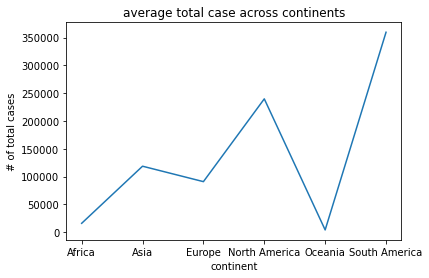

In [106]:
#so here we find the average of the new cases in each continent
data_worldwide_avg = data_worldwide.groupby(data_worldwide['continent']).mean().reset_index()

#but what does it look like? let's plot it.
plt.plot(data_worldwide_avg['continent'], data_worldwide_avg['total_cases'])

plt.xlabel('continent')
plt.ylabel('# of total cases')
plt.title('average total case across continents')


So using this, we can compare that the amount of total cases there are currently for each continent. From this we can see that Africa and Oceania both have significantly low levels of total cases in each county compared to the other continents. We can also see that North America and South America has higher total amount of cases, probably due to higher amount of interactions among individuals who tested positive.


Next, we will also look at the rate at which the amount of cases grew in each continent. We will do this by plotting time on the x-axis as a factor of months. In order to acheive this, we need to seperate each continent from the worldwide data and find the means of each per month. We can then plot this information.

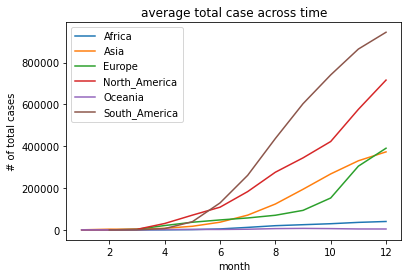

In [16]:
#splitting the data by continent
df = data_worldwide.groupby(by = data_worldwide['continent'], as_index=False)

#setting the months as numerical values such that January corresponds to 1 and December to 12
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#for each continent we will find the mean per month and plot it
Africa = df.get_group('Africa')
Africa_means = Africa.groupby(by = ['month']).mean()
Africa_means['month'] = months
plt.plot(Africa_means['month'], Africa_means['total_cases'], label = "Africa")


Asia = df.get_group('Asia')
Asia_means = Asia.groupby(by = ['month']).mean()
Asia_means['month'] = months
plt.plot(Asia_means['month'], Asia_means['total_cases'], label = "Asia")

Europe = df.get_group('Europe')
Europe_means = Europe.groupby(by = ['month']).mean()
Europe_means['month'] = months
plt.plot(Europe_means['month'], Europe_means['total_cases'], label = "Europe")

North_America = df.get_group('North America')
North_America_means = North_America.groupby(by = ['month']).mean()
North_America_means['month'] = months
plt.plot(North_America_means['month'], North_America_means['total_cases'], label = "North_America")

Oceania = df.get_group('Oceania')
Oceania_means = Oceania.groupby(by = ['month']).mean()
Oceania_means['month'] = months
plt.plot(Oceania_means['month'], Oceania_means['total_cases'], label = "Oceania")

South_America = df.get_group('South America')
South_America_means = South_America.groupby(by = ['month']).mean()
South_America_means['month'] = months
plt.plot(South_America_means['month'], South_America_means['total_cases'], label = "South_America")

plt.xlabel('month')
plt.ylabel('# of total cases')
plt.title('average total case across time')
plt.legend()

From this line graph, we can see how the continents compare over time with respect to total cases. We can see that over time, both Africa and Oceania don't increase drastically, which supports the fact that we saw these two continents with the lowest amount of total average cases. Same with the vice versa of North America and South America. This is also interesting because we can see when cases started to pick up for certain countries. For example, cases started to increase in May-June for the Americas, while for Europe, we see it drastically increasing after October. 

Next, we will be visualizing data of total cases throughout the world and this can be best visualized using a chloropleth map which should easily be a way in order to look at the data worldwide and see the number of COVID-19 cases. This can be done with a time slider as well in order to better ensure the fact that there can be a visualization of the daily change in COVID-19 cases throughout the world. 

In [114]:
#Legend updates as the number of cases change
fig = px.choropleth(data_frame = data_worldwide, 
                    locations= "iso_code",
                    color= "total_cases",
                    hover_name= "location",
                    color_continuous_scale= 'sunset', 
                    animation_frame= "date")
fig.show()

It is clear that though China starts off as the highest number of cases, over time it significantly decreases quickly posssibly because they were in lockdown for awhile. Next, America, Brazil, and India definitely slowly begin to increase and then around April it begins to increase quite rapidly everywhere and it stays quite high with a total number of cases everywhere. America definitely seems to be on the higher part of the spectrum. 

So now we have seen how the continents compare. Let's be more specific and look at a smaller (yet still big) sample: North America. So to begin with, we will look at North America's timeline. Using this timeline, we will run regression models on it to see which fits the best.

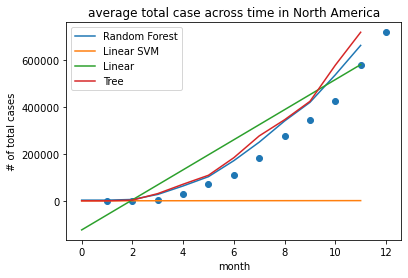

In [19]:
#extracting data for north america from the worldwide data
df = data_worldwide.groupby(by = data_worldwide['continent'], as_index=False)
North_America = df.get_group('North America')

#so let's plot the average monthly total cases
North_America_means = North_America.groupby(by = ['month']).mean()
North_America_means['month'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.scatter(North_America_means['month'], North_America_means['total_cases'])

#now, using this, we can find a regression curve to predict.
#Except how do we know which regression to use?
#let's try a couple:

#first we define our variables, x as the month, y as the total cases
x = np.array(North_America_means['month'])
x = np.reshape(x, (x.size, 1))
y = np.array(North_America_means['total_cases'])

#Random Forest regression model
reg = ensemble.RandomForestRegressor()
reg.fit(x, y) 
curve = reg.predict(x)
plt.plot(curve, label = "Random Forest")

#Linear SVM regression model
reg = svm.LinearSVR()
reg.fit(x, y) 
curve = reg.predict(x)
plt.plot(curve, label = "Linear SVM")

#Linear regression model
reg = lm.LinearRegression()
reg.fit(x, y)
curve = reg.predict(x)
plt.plot(curve,label = "Linear")

#Decision tree regression model
reg = tree.DecisionTreeRegressor()
reg.fit(x, y)
curve = reg.predict(x)
plt.plot(curve, label = "Tree")

#then we will plot each and see which is the best predictor
plt.xlabel('month')
plt.ylabel('# of total cases')
plt.title('average total case across time in North America')
plt.legend()

So, now we have some regression models for total cases over time in North America. For Linear SVM, we can clearly see that the prediction does not nearly match the actual scattered data points, as it remains at zero thoughout the year. For Linear, we see that it starts at the actual data and ends at the actual data, however, in the middle months, it does not accurately represent the actual data. We then have Tree and Random Forest left, which both seems to be an accurate representation. However, the blue line representing Random Forest still follows closer to the actual data than the Decision Tree regression. Thus, we can see that the Random Forest model best predicts our data. 

In [22]:
#drops duplicates, but keeps last occurence in the table, which represents the latest updated one
data_amer_april = data_america_april.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_may = data_america_may.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_june = data_america_june.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_july = data_america_july.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_aug = data_america_aug.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_sept = data_america_sept.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_oct =  data_america_oct.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_nov = data_america_nov.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_dec = data_america_dec.drop_duplicates(subset = ['Province_State'],keep='last')
data_amer_april


Province_State Country_Region          Last_Update      Lat  \
58                 Recovered             US  2020-04-30 02:32:31      NaN   
0                    Alabama             US  2020-05-01 02:32:32  32.3182   
1                     Alaska             US  2020-05-01 02:32:32  61.3707   
2             American Samoa             US  2020-05-01 02:32:32 -14.2710   
3                    Arizona             US  2020-05-01 02:32:32  33.7298   
4                   Arkansas             US  2020-05-01 02:32:32  34.9697   
5                 California             US  2020-05-01 02:32:32  36.1162   
6                   Colorado             US  2020-05-01 02:32:32  39.0598   
7                Connecticut             US  2020-05-01 02:32:32  41.5978   
8                   Delaware             US  2020-05-01 02:32:32  39.3185   
9           Diamond Princess             US  2020-05-01 02:32:32      NaN   
10      District of Columbia             US  2020-05-01 02:32:32  38.8974   
11                   Florida             US  2020-05-01 02:32:32  27.7663   
12                   Georgia             US  2020-05-01 02:32:32  33.0406   
13            Grand Princess             US  2020-05-01 02:32:32      NaN   
14                      Guam             US  2020-05-01 02:32:32  13.4443   
15                    Hawaii             US  2020-05-01 02:32:32  21.0943   
16                     Idaho             US  2020-05-01 02:32:32  44.2405   
17                  Illinois             US  2020-05-01 02:32:32  40.3495   
18                   Indiana             US  2020-05-01 02:32:32  39.8494   
19                      Iowa             US  2020-05-01 02:32:32  42.0115   
20                    Kansas             US  2020-05-01 02:32:32  38.5266   
21                  Kentucky             US  2020-05-01 02:32:32  37.6681   
22                 Louisiana             US  2020-05-01 02:32:32  31.1695   
23                     Maine             US  2020-05-01 02:32:32  44.6939   
24                  Maryland             US  2020-05-01 02:32:32  39.0639   
25             Massachusetts             US  2020-05-01 02:32:32  42.2302   
26                  Michigan             US  2020-05-01 02:32:32  43.3266   
27                 Minnesota             US  2020-05-01 02:32:32  45.6945   
28               Mississippi             US  2020-05-01 02:32:32  32.7416   
29                  Missouri             US  2020-05-01 02:32:32  38.4561   
30                   Montana             US  2020-05-01 02:32:32  46.9219   
31                  Nebraska             US  2020-05-01 02:32:32  41.1254   
32                    Nevada             US  2020-05-01 02:32:32  38.3135   
33             New Hampshire             US  2020-05-01 02:32:32  43.4525   
34                New Jersey             US  2020-05-01 02:32:32  40.2989   
35                New Mexico             US  2020-05-01 02:32:32  34.8405   
36                  New York             US  2020-05-01 02:32:32  42.1657   
37            North Carolina             US  2020-05-01 02:32:32  35.6301   
38              North Dakota             US  2020-05-01 02:32:32  47.5289   
39  Northern Mariana Islands             US  2020-05-01 02:32:32  15.0979   
40                      Ohio             US  2020-05-01 02:32:32  40.3888   
41                  Oklahoma             US  2020-05-01 02:32:32  35.5653   
42                    Oregon             US  2020-05-01 02:32:32  44.5720   
43              Pennsylvania             US  2020-05-01 02:32:32  40.5908   
44               Puerto Rico             US  2020-05-01 02:32:32  18.2208   
45              Rhode Island             US  2020-05-01 02:32:32  41.6809   
46            South Carolina             US  2020-05-01 02:32:32  33.8569   
47              South Dakota             US  2020-05-01 02:32:32  44.2998   
48                 Tennessee             US  2020-05-01 02:32:32  35.7478   
49                     Texas             US  2020-05-01 02:32:32  31.0545   
50        

In [23]:
monthly_map = folium.Map(location=[48, -102], zoom_start=3)
monthly_map3 = folium.Map(location=[48, -102], zoom_start=3)

In [24]:
from folium.plugins import FastMarkerCluster

april = folium.map.FeatureGroup(name="april").add_to(monthly_map)
for index, row in data_amer_april.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='orange',
                fill_opacity=0.05
        ).add_to(april)

may = folium.map.FeatureGroup(name="may").add_to(monthly_map)
for index, row in data_amer_may.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='yellow',
                fill_opacity=0.05
        ).add_to(may)

june = folium.map.FeatureGroup(name="june").add_to(monthly_map)
for index, row in data_amer_june.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='white',
                fill_opacity=0.05
        ).add_to(june)
july = folium.map.FeatureGroup(name="july").add_to(monthly_map)
for index, row in data_amer_july.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='purple',
                fill_opacity=0.05
        ).add_to(july)
aug = folium.map.FeatureGroup(name="aug").add_to(monthly_map)
for index, row in data_amer_aug.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='pink',
                fill_opacity=0.05
        ).add_to(aug)
sept = folium.map.FeatureGroup(name="sept").add_to(monthly_map)
for index, row in data_amer_sept.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='gray',
                fill_opacity=0.05
        ).add_to(sept)
        
octo = folium.map.FeatureGroup(name="oct").add_to(monthly_map)
for index, row in data_amer_oct.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='crimson',
                fill_opacity=0.05
        ).add_to(octo)
        
nov = folium.map.FeatureGroup(name="nov").add_to(monthly_map)
for index, row in data_amer_nov.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='#3186cc',
                fill_opacity=0.05
        ).add_to(nov)
dec = folium.map.FeatureGroup(name="dec").add_to(monthly_map)
for index, row in data_amer_dec.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['Confirmed'],
                popup = row['Confirmed'],
                fill = True,
                color='green',
                fill_opacity=0.05
        ).add_to(dec)

folium.LayerControl().add_to(monthly_map)


In [25]:
monthly_map

In [28]:
data_amer_april['new cases'] = data_amer_april['Confirmed']
data_amer_may['new cases'] = data_amer_may['Confirmed'] - data_amer_april['Confirmed']
data_amer_june['new cases'] = data_amer_june['Confirmed'] - data_amer_may['Confirmed']
data_amer_july['new cases'] = data_amer_july['Confirmed'] - data_amer_june['Confirmed']
data_amer_aug['new cases'] = data_amer_aug['Confirmed'] - data_amer_july['Confirmed']
data_amer_sept['new cases'] = data_amer_sept['Confirmed'] - data_amer_aug['Confirmed']
data_amer_oct['new cases'] = data_amer_oct['Confirmed'] - data_amer_sept['Confirmed']
data_amer_nov['new cases'] = data_amer_nov['Confirmed'] - data_amer_oct['Confirmed']
data_amer_dec['new cases'] = data_amer_dec['Confirmed'] - data_amer_nov['Confirmed']
data_amer_dec

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-12-06 05:30:26  32.3182   
1                     Alaska             US  2020-12-06 05:30:26  61.3707   
2             American Samoa             US  2020-12-06 05:30:26 -14.2710   
3                    Arizona             US  2020-12-06 05:30:26  33.7298   
4                   Arkansas             US  2020-12-06 05:30:26  34.9697   
5                 California             US  2020-12-06 05:30:26  36.1162   
6                   Colorado             US  2020-12-06 05:30:26  39.0598   
7                Connecticut             US  2020-12-06 05:30:26  41.5978   
8                   Delaware             US  2020-12-06 05:30:26  39.3185   
9           Diamond Princess             US  2020-12-06 05:30:26      NaN   
10      District of Columbia             US  2020-12-06 05:30:26  38.8974   
11                   Florida             US  2020-12-06 05:30:26  27.7663   
12                   Georgia             US  2020-12-06 05:30:26  33.0406   
13            Grand Princess             US  2020-12-06 05:30:26      NaN   
14                      Guam             US  2020-12-06 05:30:26  13.4443   
15                    Hawaii             US  2020-12-06 05:30:26  21.0943   
16                     Idaho             US  2020-12-06 05:30:26  44.2405   
17                  Illinois             US  2020-12-06 05:30:26  40.3495   
18                   Indiana             US  2020-12-06 05:30:26  39.8494   
19                      Iowa             US  2020-12-06 05:30:26  42.0115   
20                    Kansas             US  2020-12-06 05:30:26  38.5266   
21                  Kentucky             US  2020-12-06 05:30:26  37.6681   
22                 Louisiana             US  2020-12-06 05:30:26  31.1695   
23                     Maine             US  2020-12-06 05:30:26  44.6939   
24                  Maryland             US  2020-12-06 05:30:26  39.0639   
25             Massachusetts             US  2020-12-06 05:30:26  42.2302   
26                  Michigan             US  2020-12-06 05:30:26  43.3266   
27                 Minnesota             US  2020-12-06 05:30:26  45.6945   
28               Mississippi             US  2020-12-06 05:30:26  32.7416   
29                  Missouri             US  2020-12-06 05:30:26  38.4561   
30                   Montana             US  2020-12-06 05:30:26  46.9219   
31                  Nebraska             US  2020-12-06 05:30:26  41.1254   
32                    Nevada             US  2020-12-06 05:30:26  38.3135   
33             New Hampshire             US  2020-12-06 05:30:26  43.4525   
34                New Jersey             US  2020-12-06 05:30:26  40.2989   
35                New Mexico             US  2020-12-06 05:30:26  34.8405   
36                  New York             US  2020-12-06 05:30:26  42.1657   
37            North Carolina             US  2020-12-06 05:30:26  35.6301   
38              North Dakota             US  2020-12-06 05:30:26  47.5289   
39  Northern Mariana Islands             US  2020-12-06 05:30:26  15.0979   
40                      Ohio             US  2020-12-06 05:30:26  40.3888   
41                  Oklahoma             US  2020-12-06 05:30:26  35.5653   
42                    Oregon             US  2020-12-06 05:30:26  44.5720   
43              Pennsylvania             US  2020-12-06 05:30:26  40.5908   
44               Puerto Rico             US  2020-12-06 05:30:26  18.2208   
45              Rhode Island             US  2020-12-06 05:30:26  41.6809   
46            South Carolina             US  2020-12-06 05:30:26  33.8569   
47              South Dakota             US  2020-12-06 05:30:26  44.2998   
48                 Tennessee             US  2020-12-06 05:30:26  35.7478   
49                     Texas             US  2020-12-06 05:30:26  31.0545   
50                      Utah             US  2020-12-06 05:30:26  40.1500   
51        

In [29]:
from folium.plugins import FastMarkerCluster
#Active or Confirmed?
#or should we do new cases by subtracting prev total month and new total
april = folium.map.FeatureGroup(name="april").add_to(monthly_map3)
for index, row in data_amer_april.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='orange',
                fill_opacity=0.05
        ).add_to(april)
may = folium.map.FeatureGroup(name="may").add_to(monthly_map3)
for index, row in data_amer_may.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='yellow',
                fill_opacity=0.05
        ).add_to(may)
june = folium.map.FeatureGroup(name="june").add_to(monthly_map3)
for index, row in data_amer_june.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='white',
                fill_opacity=0.05
        ).add_to(june)
july = folium.map.FeatureGroup(name="july").add_to(monthly_map3)
for index, row in data_amer_july.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='purple',
                fill_opacity=0.05
        ).add_to(july)
aug = folium.map.FeatureGroup(name="aug").add_to(monthly_map3)
for index, row in data_amer_aug.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='pink',
                fill_opacity=0.05
        ).add_to(aug)
sept = folium.map.FeatureGroup(name="sept").add_to(monthly_map3)
for index, row in data_amer_sept.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='gray',
                fill_opacity=0.05
        ).add_to(sept)
octo = folium.map.FeatureGroup(name="oct").add_to(monthly_map3)
for index, row in data_amer_oct.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='crimson',
                fill_opacity=0.05
        ).add_to(octo)
nov = folium.map.FeatureGroup(name="nov").add_to(monthly_map3)
for index, row in data_amer_nov.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='#3186cc',
                fill_opacity=0.05
        ).add_to(nov)
dec = folium.map.FeatureGroup(name="dec").add_to(monthly_map3)
for index, row in data_amer_dec.iterrows():
    if pd.notna(row['Long_']) and pd.notna(row['Lat']):
        folium.Circle(
                location= [row['Lat'],row['Long_']],
                radius = row['new cases'],
                popup = row['new cases'],
                fill = True,
                color='green',
                fill_opacity=0.05
        ).add_to(dec)

folium.LayerControl().add_to(monthly_map3)


In [30]:
monthly_map3
#with the new cases, we can see that it gets smaller over time suggesting that it is curbing. 
#we can also see when there were spikes in cases

In [34]:
#adding interaction terms for worldwide based on time 
#adding dummies for continents(bc we saw earlier that the continents have different data)
#first for worldwide, let's look at the most up to date one so let's drop the duplicates
#data_worldwide_latest = data_worldwide.drop_duplicates(subset = ['location'],keep='last')
terms = pd.get_dummies(data_worldwide, columns = ['continent'])

terms['term_Africa'] = terms['continent_Africa']*terms['month']
terms['term_Asia'] = terms['continent_Asia']*terms['month']
terms['term_Europe'] = terms['continent_Europe']*terms['month']
terms['term_North America'] = terms['continent_North America']*terms['month']
terms['term_Oceania'] = terms['continent_Oceania']*terms['month']
terms['term_South America'] = terms['continent_South America']*terms['month']
#terms['continent'] = data_worldwide['continent']
terms

iso_code     location        date  total_cases  new_cases  \
0          AFG  Afghanistan  2020-01-23          NaN        0.0   
1          AFG  Afghanistan  2020-01-24          NaN        0.0   
2          AFG  Afghanistan  2020-01-25          NaN        0.0   
3          AFG  Afghanistan  2020-01-26          NaN        0.0   
4          AFG  Afghanistan  2020-01-27          NaN        0.0   
...        ...          ...         ...          ...        ...   
60857      ZWE     Zimbabwe  2020-12-01      10129.0      179.0   
60858      ZWE     Zimbabwe  2020-12-02      10129.0        0.0   
60859      ZWE     Zimbabwe  2020-12-03      10424.0      295.0   
60860      ZWE     Zimbabwe  2020-12-04      10547.0      123.0   
60861      ZWE     Zimbabwe  2020-12-05      10617.0       70.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                     NaN           NaN         0.0                  NaN   
1                     NaN           NaN         0.0                  NaN   
2                     NaN           NaN         0.0                  NaN   
3                     NaN           NaN         0.0                  NaN   
4                     NaN           NaN         0.0                  NaN   
...                   ...           ...         ...                  ...   
60857             104.429         277.0         1.0                0.429   
60858              88.714         277.0         0.0                0.429   
60859             114.429         280.0         3.0                0.857   
60860             119.000         281.0         1.0                0.857   
60861             113.571         291.0        10.0                2.286   

       total_cases_per_million  ...  continent_Europe  \
0                          NaN  ...                 0   
1                          NaN  ...                 0   
2                          NaN  ...                 0   
3                          NaN  ...                 0   
4                          NaN  ...                 0   
...                        ...  ...               ...   
60857                  681.494  ...                 0   
60858                  681.494  ...                 0   
60859                  701.342  ...                 0   
60860                  709.618  ...                 0   
60861                  714.328  ...                 0   

       continent_North America  continent_Oceania  continent_South America  \
0                            0                  0                        0   
1                            0                  0                        0   
2                            0                  0                        0   
3                            0                  0                        0   
4                            0                  0                        0   
...                        ...                ...                      ...   
60857                        0                  0                        0   
60858                        0                  0                        0   
60859                        0                  0                        0   
60860                        0                  0                        0   
60861                        0                  0                        0   

       term_Africa  term_Asia  term_Europe  term_North America  term_Oceania  \
0                0          1            0                   0             0   
1                0          1            0                   0             0   
2                0          1            0                   0             0   
3                0          1            0                   0             0   
4                0          1            0                   0             0   
...            ...        ...          ...                 ...           ...   
60857           12          0            0                   0             0   
60858           12        

In [35]:
#let's first see if the interaction terms have an effect on cases (then later do deaths)
#let's do a random forest fit since earlier we saw that it was the best fit
#terms = terms.fillna()
#print(terms)
#terms = terms.dropna()
terms = terms[terms['total_cases'].notna()]
term = ['month', 'term_Africa', 'term_North America','term_South America','term_Asia',
        'term_Europe', 'term_Oceania', 'continent_Africa', 'continent_North America',
        'continent_South America','continent_Asia', 'continent_Europe', 'continent_Oceania']

x = terms[term]
y = terms['total_cases']

reg = lm.LinearRegression()
reg.fit(x, y) 

#months = terms['month']
#terms = reg.predict(terms[months])
prediction = reg.predict(terms[term])
terms['pred'] = prediction
#plt.scatter(terms['month'], terms['total_cases'], label = "actual")
#plt.scatter(terms['month'], terms['pred'], label = "predicted")
#sns.violinplot(terms['continent'], terms['total_cases'])
#plt.legend()

coef = reg.coef_
intercept = reg.intercept_

print(f'total cases = {intercept} + {coef[0]}{term[0]} + \
        {coef[1]}{term[1]} + {coef[2]}{term[2]} + {coef[3]}{term[3]} + \
        {coef[4]}{term[4]} + {coef[5]}{term[5]} + {coef[6]}{term[6]} + \
        {coef[7]}{term[7]} + {coef[8]}{term[8]} + {coef[9]}{term[9]} + \
        {coef[10]}{term[10]} + {coef[11]}{term[11]} + {coef[12]}{term[12]}')


total cases = -10254568.833417684 + 2951367.84519253month +         -2946254.333301725term_Africa + -2879607.558967636term_North America + -2831780.498426022term_South America +         -2911233.505744149term_Asia + -2921517.9141034term_Europe + -2950757.2817984014term_Oceania +         10232844.02824028continent_Africa + 9977439.729240108continent_North America + 9757729.012541993continent_South America +         10094610.549450697continent_Asia + 10136855.957843516continent_Europe + 10253948.31146027continent_Oceania


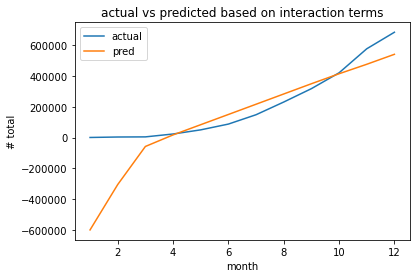

In [36]:
#starting to look at death rates
#data_worldwide
total_cases = terms.groupby(['month'])['total_cases'].mean()
#total_deaths = terms.groupby(['month'])['total_deaths'].mean()

pred_cases = terms.groupby(['month'])['pred'].mean()
#new_deaths = data_worldwide_latest.groupby(['month'])['new_deaths'].mean()

#months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#plt.plot(months, total_deaths, label = 'total deaths')
#plt.plot(months, total_cases, label = 'total cases')

plt.plot( total_cases, label = 'actual')
plt.plot(pred_cases, label = 'pred')

plt.xlabel('month')
plt.ylabel('# total')
plt.title('actual vs predicted based on interaction terms')
plt.legend()
#data = {
#    'month': months,
#    'cases': cases,
#    'deaths': deaths
#}
#df = pd.DataFrame(data)
#df
#now we can see that the new deaths compared to the new cases are quite low. WAIT IS THIS CORRECT BC IS IT THIS LOW??
#but what other factors are there? we can add interaction terms for the things in the table 

In [37]:
combined_data = combined_data.drop_duplicates(subset = ['Country'])
combined_data

Country         Place Start date   End date         Level  \
0          China     Xiangyang 2020-01-28 2020-03-25          City   
17   Philippines  Soccsksargen 2020-03-23 2020-04-30        Region   
22    Montenegro          Tuzi 2020-03-24        NaT  Municipality   
24          Fiji       Lautoka 2020-03-20 2020-04-07          City   
26       Liberia       Margibi 2020-03-23 2020-04-11        County   
..           ...           ...        ...        ...           ...   
205         Cuba           NaN 2020-03-23 2020-07-20      National   
206   Costa Rica           NaN 2020-03-23 2020-08-01      National   
207   Bangladesh           NaN 2020-03-26 2020-04-29      National   
208      Albania           NaN 2020-03-10 2020-04-19      National   
209     Zimbabwe           NaN 2020-03-30 2020-07-02      National   

         update  Confirmed  total_cases  
0    2020-02-04       True      94821.0  
17   2020-03-12      False     456562.0  
22   2020-03-16      False      43390.0  
24   2020-03-19      False         46.0  
26   2020-03-21      False       1779.0  
..          ...        ...          ...  
205  2020-09-01       True       9893.0  
206  2020-09-01       True     157472.0  
207  2020-09-01       True     498293.0  
208  2020-09-01       True      52004.0  
209  2020-09-01       True      12047.0  

[98 rows x 8 columns]

Text(0.5, 1.0, 'total cases with respect to start lockdown date')

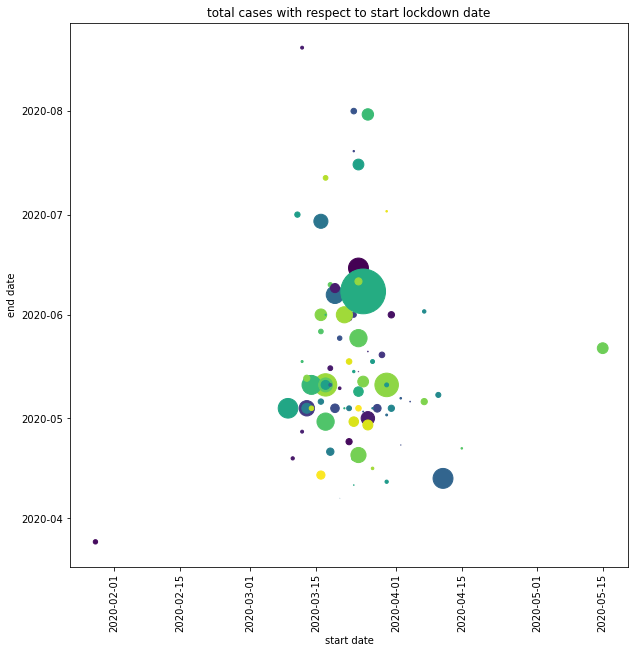

In [38]:
plt.figure(figsize=(10,10))
colors = np.random.rand(len(combined_data))

plt.scatter(combined_data['Start date'], combined_data['End date'], s=(combined_data['total_cases'])/5000,  c=colors)
#for index, row in combined_data.iterrows():
#    plt.annotate(row['Country'], (row['Start date'], row['End date']),size=10)
    
    
plt.xlabel('start date')
plt.xticks(rotation=90)
plt.ylabel('end date')
plt.title('total cases with respect to start lockdown date')


Here, we can discuss the correlation of different factors such as population density, older individuals (70 or older), extreme poverty, cardiovascular death rate, smokers, as well as handwashing facilities and their correlation with total and new cases as well as deaths. This allows for an understand to see where it seems to be strongly correlated whereas others where it is not. Without having this, there are many who have incorrect assumptions of correlations that may not exist and having data to see it would definitely be beneficial.

In [111]:
#Have the x-values with the heatmap dataframe
heatmap_x = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests', 'positive_rate', 'tests_units']
data_worldwide_x = data_worldwide[heatmap_x]
data_worldwide_x

total_cases  new_cases  total_deaths  new_deaths  new_tests  \
0              NaN        0.0           NaN         0.0        NaN   
1              NaN        0.0           NaN         0.0        NaN   
2              NaN        0.0           NaN         0.0        NaN   
3              NaN        0.0           NaN         0.0        NaN   
4              NaN        0.0           NaN         0.0        NaN   
...            ...        ...           ...         ...        ...   
60857      10129.0      179.0         277.0         1.0     1029.0   
60858      10129.0        0.0         277.0         0.0     1862.0   
60859      10424.0      295.0         280.0         3.0        NaN   
60860      10547.0      123.0         281.0         1.0        NaN   
60861      10617.0       70.0         291.0        10.0        NaN   

       positive_rate      tests_units  
0                NaN              NaN  
1                NaN              NaN  
2                NaN              NaN  
3                NaN              NaN  
4                NaN              NaN  
...              ...              ...  
60857          0.088  tests performed  
60858          0.069  tests performed  
60859            NaN              NaN  
60860            NaN              NaN  
60861            NaN              NaN  

[60862 rows x 7 columns]

In [112]:
#Have the y-values with the heatmap dataframe
heatmap_y = ['population_density', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate', 'handwashing_facilities']
data_worldwide_y = data_worldwide[heatmap_y]
data_worldwide_y['smokers'] = data_worldwide['female_smokers'] + data_worldwide['male_smokers']
data_worldwide_y


<ipython-input-112-7a567ceb2565>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



population_density  aged_70_older  extreme_poverty  \
0                  54.422          1.337              NaN   
1                  54.422          1.337              NaN   
2                  54.422          1.337              NaN   
3                  54.422          1.337              NaN   
4                  54.422          1.337              NaN   
...                   ...            ...              ...   
60857              42.729          1.882             21.4   
60858              42.729          1.882             21.4   
60859              42.729          1.882             21.4   
60860              42.729          1.882             21.4   
60861              42.729          1.882             21.4   

       cardiovasc_death_rate  handwashing_facilities  smokers  
0                    597.029                  37.746      NaN  
1                    597.029                  37.746      NaN  
2                    597.029                  37.746      NaN  
3                    597.029                  37.746      NaN  
4                    597.029                  37.746      NaN  
...                      ...                     ...      ...  
60857                307.846                  36.791     32.3  
60858                307.846                  36.791     32.3  
60859                307.846                  36.791     32.3  
60860                307.846                  36.791     32.3  
60861                307.846                  36.791     32.3  

[60862 rows x 6 columns]

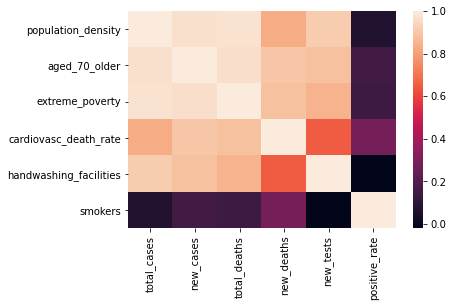

In [113]:
#Correlation map with x and y respective values
corrx = data_worldwide_x.corr()
corry = data_worldwide_y.corr()
sns.heatmap(corrx, xticklabels=corrx.columns, yticklabels=corry.columns)

From this, it is clear to see analyze that there is a high correlation with population density with number of cases, deaths, but not positivity rate. Not only that, but there is a high correlation with older individuals (70 or older), extreme poverty, cardiovascular death rate, and handwashing facilities with everything but positivity rate. Areas with many smokers do not have a high correlation rate with cases except do have a high correlation with positivity rates which is very interesting. This shows that more focus needs to go onto areas with high population density, extreme poverty, older individuals, especially with the vaccine and preventing spikes.

### Conclusion

After looking more into detail of the specifics of COVID-19 cases, it is clear that America had many COVID-19 cases, and not only that but worldwide, the start lockdown dates do not seem to have a direct correlation with a higher amount of total cases as we initially predicted. However, another one of our initial predictions regarding population density, poverty, older inviduals, and handwashing facilities all seemed to have a high amount of correlation to total cases. 

What can really be seen is that looking at the worldwide map of COVID-19 cases over time, there seemed to be a high amount of cases in China, however they had quickly come down compared to America which rose up and consistently stayed high. Then it start going lower and then spiked up again recently. Our goal with this analysis is to figure out how to lower the amount of COVID-19 cases and eventually bring it to 0- so what did China do in order to lower their cases and what can America do to attempt to implement a similar thing? Definitely a lockdown seems to be a valuable option though an earlier start for a lockdown did not seem to have a high correlation with a low amount of total cases, it may allow for a better situation with new cases. 

Analyzing COVID-19 data first throughout the world based on continents and then based on time we feel as though gave a great visualization in order to really understand what was happening and at what time periods certain places had a spike and why. This will also help gauge when to release the vaccine in those locations and before what time it would be important to do so. Not only that, but looking at America per month and seeing the new cases allowed to see for what reasons there would be spikes and it is clear that during holiday seasons when family and friends are visiting it spikes. There are many factors that cause for spikes, and though there is a vaccine, it may not get to everyone soon enough and before losing more lives it is important to understand the pattern and see where we can improve, happy holidays everyone!